<a href="https://colab.research.google.com/github/Varkenes/Tensorflow-Keras-Niebla/blob/main/70Train_30Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/70%20entrenamiento%20niebla.csv')

In [ ]:
print(df)

       N     T (°C)     HR (%)  ...        Vy  Nubosidad(%)  Flujo (L/día)
0     12  17.470833  49.156250  ...  0.086527             6           0.00
1      6  18.611458  50.416667  ... -0.087348             7           0.00
2     36  12.633333  74.333333  ...  0.061945            99           0.00
3    148   9.995238  78.976190  ...  0.011856             6           0.00
4    181  12.193939  88.606061  ...  0.160884           100           0.00
..   ...        ...        ...  ...       ...           ...            ...
142  190  11.731250  90.104167  ...  0.024998            85           0.06
143  168  14.535556  61.022222  ... -0.056594             9           0.00
144  161   9.745833  86.750000  ...  0.120831           100           0.00
145   30  17.114141  34.767677  ... -0.013711             5           0.14
146  127   9.321622  84.189189  ...  0.012399            48           0.00

[147 rows x 9 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[ 1.20000000e+01  1.74708333e+01  4.91562500e+01 ...  8.65271980e-02
   6.00000000e+00  0.00000000e+00]
 [ 6.00000000e+00  1.86114583e+01  5.04166667e+01 ... -8.73477370e-02
   7.00000000e+00  0.00000000e+00]
 [ 3.60000000e+01  1.26333333e+01  7.43333333e+01 ...  6.19447680e-02
   9.90000000e+01  0.00000000e+00]
 ...
 [ 1.61000000e+02  9.74583333e+00  8.67500000e+01 ...  1.20830689e-01
   1.00000000e+02  0.00000000e+00]
 [ 3.00000000e+01  1.71141414e+01  3.47676768e+01 ... -1.37106700e-02
   5.00000000e+00  1.40000000e-01]
 [ 1.27000000e+02  9.32162162e+00  8.41891892e+01 ...  1.23986360e-02
   4.80000000e+01  0.00000000e+00]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,1:8]
Y=dataset[:,8]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos70_30.csv", entrenamientodedatos, delimiter=",")

[[ 1.74708333e+01  4.91562500e+01  1.01184375e+03 ... -5.85290697e-01
   8.65271980e-02  6.00000000e+00]
 [ 1.86114583e+01  5.04166667e+01  1.01187500e+03 ... -6.10434067e-01
  -8.73477370e-02  7.00000000e+00]
 [ 1.26333333e+01  7.43333333e+01  1.01415208e+03 ... -1.95765553e-01
   6.19447680e-02  9.90000000e+01]
 ...
 [ 9.74583333e+00  8.67500000e+01  1.00797500e+03 ... -7.94890325e-01
   1.20830689e-01  1.00000000e+02]
 [ 1.71141414e+01  3.47676768e+01  1.01310707e+03 ... -2.81433973e-01
  -1.37106700e-02  5.00000000e+00]
 [ 9.32162162e+00  8.41891892e+01  1.01521875e+03 ... -4.28765339e-01
   1.23986360e-02  4.80000000e+01]]


In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos70_30.csv", testeodedatos, delimiter=",")

[0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.74 0.   0.02 0.   0.33
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.   2.81 0.22
 0.   0.   1.91 0.12 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   1.97 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.18 0.   0.   0.04
 2.49 0.19 0.01 0.   0.   1.55 0.   0.   0.   0.   0.01 0.   0.01 0.
 0.   0.   0.   0.37 0.   0.08 0.   0.1  0.   0.   0.   0.   0.   0.
 0.   0.14 0.   0.   0.   0.   0.   0.   0.08 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.15 0.   0.   0.24 0.04 0.   0.
 0.   0.01 0.   0.   0.   0.   0.   1.55 0.14 0.01 0.   0.   0.17 0.
 0.   0.   0.06 0.   0.   0.14 0.  ]


# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[7]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=8,verbose=2)

Epoch 1/8
5/5 - 1s - loss: 1012.8892 - mae: 20.8434 - mse: 1012.8892
Epoch 2/8
5/5 - 0s - loss: 2.1567 - mae: 1.2720 - mse: 2.1567
Epoch 3/8
5/5 - 0s - loss: 6.2786 - mae: 2.1402 - mse: 6.2786
Epoch 4/8
5/5 - 0s - loss: 325.3456 - mae: 16.2946 - mse: 325.3456
Epoch 5/8
5/5 - 0s - loss: 161.5040 - mae: 11.7489 - mse: 161.5040
Epoch 6/8
5/5 - 0s - loss: 49.5518 - mae: 6.8807 - mse: 49.5518
Epoch 7/8
5/5 - 0s - loss: 273.3518 - mae: 16.3550 - mse: 273.3518
Epoch 8/8
5/5 - 0s - loss: 135.8659 - mae: 11.4756 - mse: 135.8659


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-8h4yngn_
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-8h4yngn_
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c60db3aa06bcd8030c684949373997ef2f03cdf8_-py3-none-any.whl size=154243 sha256=fa29bdad58b7084500225cb0476e381b059d01786bce705f7e661d3692def568
  Stored in directory: /tmp/pip-ephem-wheel-cache-ws3eu0oo/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 8500

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0907,  mae:0.1388,  mse:0.0907,  
....................................................................................................
Epoch: 100, loss:0.0448,  mae:0.0800,  mse:0.0448,  
....................................................................................................
Epoch: 200, loss:0.0555,  mae:0.0949,  mse:0.0555,  
....................................................................................................
Epoch: 300, loss:0.0951,  mae:0.1319,  mse:0.0951,  
....................................................................................................
Epoch: 400, loss:0.0463,  mae:0.0893,  mse:0.0463,  
....................................................................................................
Epoch: 500, loss:0.0473,  mae:0.0857,  mse:0.0473,  
....................................................................................................
Epoch: 600, loss:0.1135,  mae:0.1744,  mse:0.1135,  
........................

## **Gráfica Valores Reales V/s Predicción**

0.6965142611447603

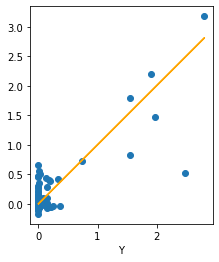

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict70.csv", prediction, delimiter=",")

[[-0.07219076]
 [-0.06876153]
 [-0.06255001]
 [ 0.4710028 ]
 [-0.0389573 ]
 [-0.01856464]
 [ 0.05057067]
 [-0.0655219 ]
 [-0.06234401]
 [ 0.71977955]
 [-0.06832308]
 [-0.03655601]
 [-0.01950145]
 [ 0.42816332]
 [ 0.00335544]
 [-0.01445293]
 [-0.02347714]
 [-0.05574119]
 [-0.04930151]
 [-0.05928153]
 [ 0.00898105]
 [-0.06861413]
 [-0.04670215]
 [ 0.49974087]
 [-0.07390517]
 [-0.05921215]
 [ 3.1773589 ]
 [-0.05605406]
 [-0.03659409]
 [-0.02628595]
 [ 2.194361  ]
 [ 0.44388157]
 [-0.06174511]
 [-0.02185041]
 [-0.00877392]
 [-0.05635732]
 [-0.01647013]
 [ 0.04685175]
 [-0.0424096 ]
 [-0.05567306]
 [-0.06254739]
 [-0.10987324]
 [-0.17153639]
 [-0.03966486]
 [-0.05700547]
 [ 1.4659896 ]
 [ 0.14358634]
 [-0.02592409]
 [-0.02112526]
 [ 0.20871916]
 [-0.06018895]
 [-0.05804533]
 [ 0.2884892 ]
 [-0.03787452]
 [-0.0698781 ]
 [ 0.11792478]
 [-0.01929754]
 [-0.03651625]
 [ 0.0105055 ]
 [ 0.15037185]
 [-0.06240588]
 [-0.02348226]
 [-0.0631848 ]
 [-0.05792564]
 [-0.07269192]
 [-0.0791778 ]
 [-0.04664

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/30%20testeo%20niebla.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,1:8]
Ytest=dataset2[:,8]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.5195979029514433


-0.3824131359709615

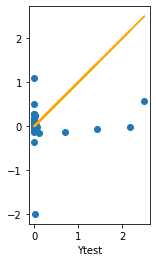

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')
plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

np.savetxt("predict30.csv", predict, delimiter=",")

[[-0.04439539]
 [ 0.05087253]
 [-0.05562991]
 [ 0.04616374]
 [-0.07129341]
 [-0.03120238]
 [-0.04512161]
 [ 0.06160197]
 [-0.06642008]
 [-0.12647957]
 [-0.3709606 ]
 [-0.06505352]
 [ 0.05802789]
 [-1.9984043 ]
 [ 0.11307782]
 [ 0.26414672]
 [-0.06001401]
 [-0.01970422]
 [-0.12569815]
 [ 0.00567347]
 [-0.03979897]
 [-0.06154424]
 [ 0.56488997]
 [-0.07239789]
 [ 0.1817601 ]
 [ 0.12396559]
 [-0.03605539]
 [-0.01107258]
 [-0.04681796]
 [-0.00384438]
 [-0.06988573]
 [ 0.1714009 ]
 [ 0.06183565]
 [ 0.06486779]
 [ 0.24410897]
 [-0.06407374]
 [ 0.01798135]
 [-0.06599289]
 [-0.05001301]
 [-0.08078879]
 [-0.04975218]
 [-0.01557279]
 [ 0.5075472 ]
 [-0.06006306]
 [-0.11551422]
 [-0.06182724]
 [-0.07268804]
 [-0.05848807]
 [-0.0668065 ]
 [-0.00909042]
 [ 0.03470737]
 [-0.04199189]
 [ 0.22952777]
 [-0.15911049]
 [ 1.0922346 ]
 [-0.05173463]
 [ 0.28193074]
 [-0.0474388 ]
 [-0.0445115 ]
 [-0.01795858]
 [-0.05608028]
 [-0.06629211]
 [-0.1009143 ]
 [ 0.03587735]
 [ 0.04318938]]
